<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

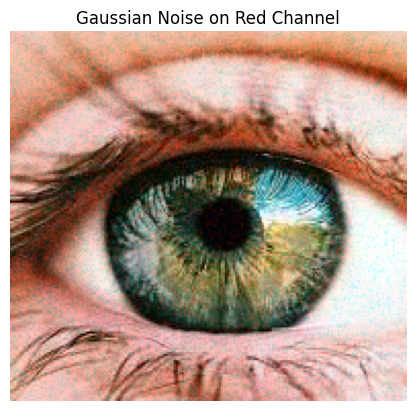

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_gaussian_noise_red_channel(image, mean=0, sigma=25):
    # Separate the red channel
    red_channel = image[:, :, 2]
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, red_channel.shape)

    # Add the noise to the red channel and clip values to keep them in [0, 255]
    noisy_red_channel = np.clip(red_channel + gaussian_noise, 0, 255).astype(np.uint8)

    # Reconstruct the image by replacing the red channel with the noisy version
    noisy_image = image.copy()
    noisy_image[:, :, 2] = noisy_red_channel


    return noisy_image

# Example usage..
color_image = cv2.imread('/pic.jpeg')
noisy_image_red = add_gaussian_noise_red_channel(color_image)


plt.imshow(cv2.cvtColor(noisy_image_red, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noise on Red Channel')
plt.axis('off')
plt.show()


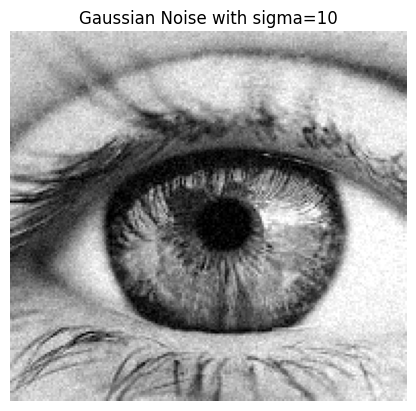

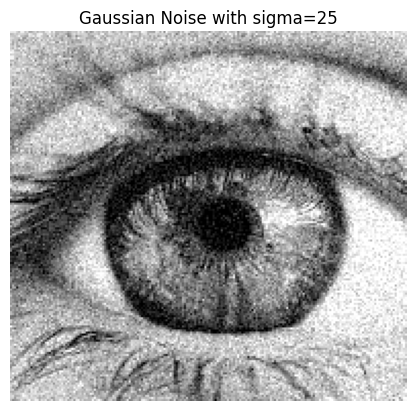

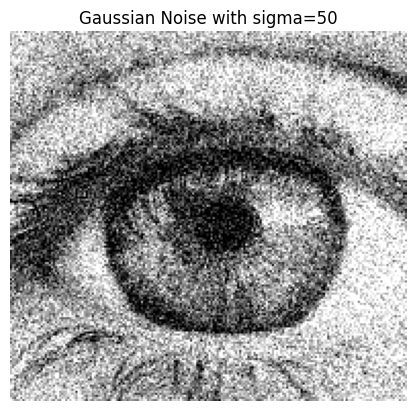

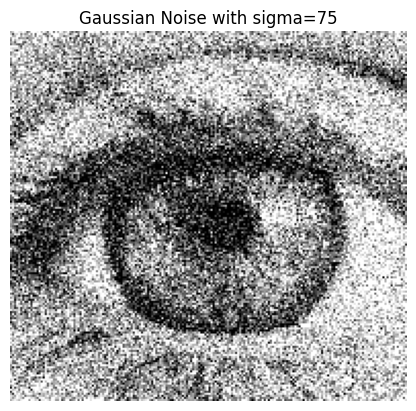

In [ ]:
def add_gaussian_noise_gray(image, mean=0, sigma=25):
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape)
    #print(gaussian_noise)

    # Add the noise to the image and clip values to keep them in [0, 255]
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

# Example usage and observing sigma effect
gray_image = cv2.imread('/pic.jpeg', cv2.IMREAD_GRAYSCALE)



# Test different sigma values
for sigma in [10, 25, 50, 75]:
    noisy_image_gray = add_gaussian_noise_gray(gray_image, sigma=sigma)
    plt.imshow(noisy_image_gray, cmap='gray')
    plt.title(f'Gaussian Noise with sigma={sigma}')
    plt.axis('off')
    plt.show()


[124  77  45 ... 131  57  33]
[105 174 176 ...  84   5  38]


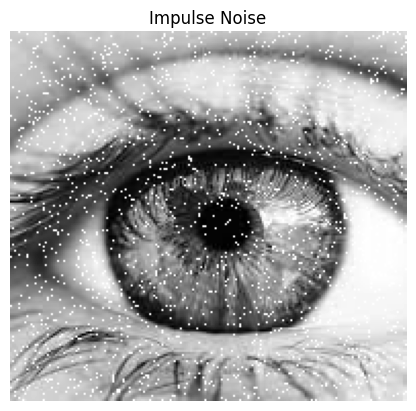

In [ ]:
def add_impulse_noise(image, noise_ratio=0.05):
    noisy_image = image.copy()
    num_noisy_pixels = int(noise_ratio * image.size)

    # Choose random pixel indices
    y_coords = np.random.randint(0, image.shape[0], num_noisy_pixels)
    x_coords = np.random.randint(0, image.shape[1], num_noisy_pixels)

    # Apply noise by halving the value of selected pixels
    noisy_image[y_coords, x_coords] = 255

    return noisy_image

# Example usage
impulse_noisy_image = add_impulse_noise(gray_image)
plt.imshow(impulse_noisy_image, cmap='gray')
plt.title('Impulse Noise')
plt.axis('off')
plt.show()


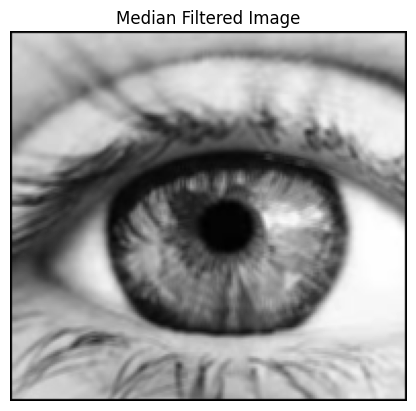

In [ ]:
def median_filter(originalImg , kernelSize: int):

    padded_image = np.pad(originalImg, kernelSize//2, mode='reflect')
    filteredImage = np.zeros(originalImg.shape, dtype=np.int32)

    image_h, image_w = originalImg.shape[0], originalImg.shape[1]

    w = kernelSize // 2

    for i in range(w, image_h - w):
        for j in range(w, image_w - w):
            total = 0

            for m in range(kernelSize):
                for n in range(kernelSize):
                    total += padded_image[i - w + m][j - w + n]

            # Compute the mean value and assign it to the output image
            filteredImage[i, j] = total // (kernelSize * kernelSize)  # Integer division

    return filteredImage
median_filtered_image = median_filter(gray_image,3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()


In [ ]:
def apply_convolution(image, kernel):
    padded_image = np.pad(image, kernel.shape[0]//2, mode='reflect')

    image_height, image_width = image.shape
    k_height, k_width = kernel.shape  # Corrected typo here


    output = np.zeros_like(image)

    # Perform convolution
    for y in range(image_height):
        for x in range(image_width):
            region = padded_image[y:y+k_height, x:x+k_width]
            output[y, x] = np.sum(region * kernel)

    return output


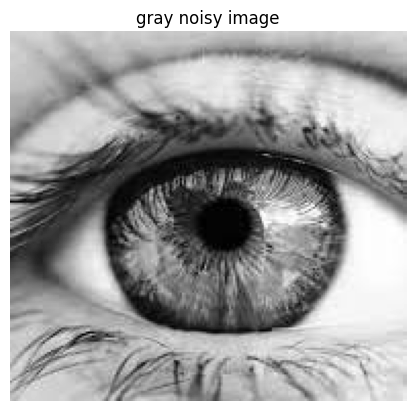

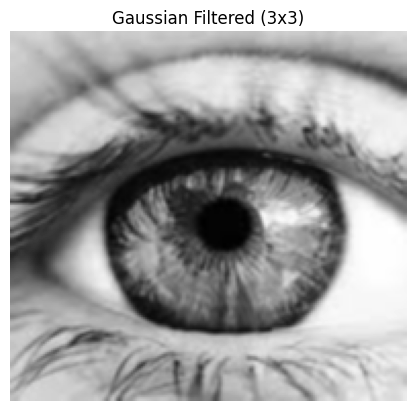

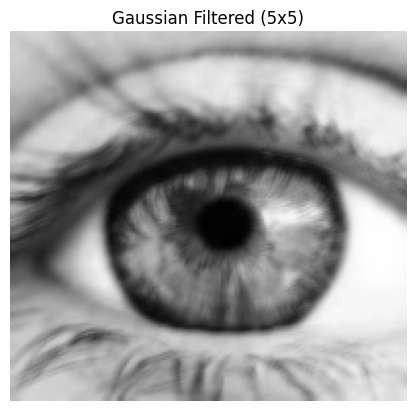

In [ ]:
gray_image = cv2.imread('/pic.jpeg', cv2.IMREAD_GRAYSCALE)
noisy_image_gray = add_gaussian_noise_gray(gray_image, sigma=25)
plt.imshow(gray_image, cmap='gray')
plt.title('gray noisy image')
plt.axis('off')
plt.show()

# Apply Gaussian filters
def gaussian_filter_3x3(image):
  gaussian_kernel = (1/16) * np.array([[1, 2, 1],
                                     [2, 4, 2],
                                     [1, 2, 1]])
  return apply_convolution(image, gaussian_kernel)
#gaussian_kernel_3x3 = gaussian_kernel(gray_image,3, sigma=25)
#print(gaussian_kernel_3x3)

gaussian_filtered_3x3 = gaussian_filter_3x3(gray_image)

plt.imshow(gaussian_filtered_3x3, cmap='gray')
plt.title('Gaussian Filtered (3x3)')
plt.axis('off')
plt.show()
def gaussian_filter_5x5(image):
  gaussian_kernel = (1/256) * np.array([[1, 4, 4, 16, 6],
                                      [4, 24, 16, 1, 4],
                                      [6, 24, 4, 1, 16],
                                      [4,  36, 24, 24, 6],
                                      [16, 4, 6, 4, 1]])
  return apply_convolution(image, gaussian_kernel)
gaussian_filtered_5x5 = gaussian_filter_5x5(gray_image)

plt.imshow(gaussian_filtered_5x5, cmap='gray')
plt.title('Gaussian Filtered (5x5)')
plt.axis('off')
plt.show()

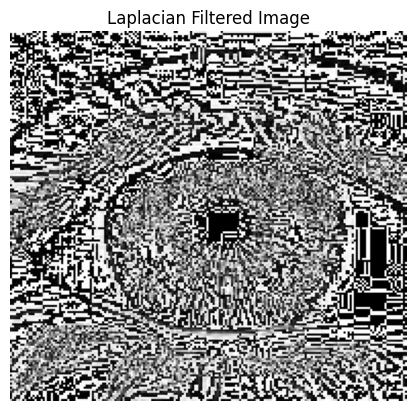

In [ ]:
def laplacian_filter(image):
    laplacian_kernel = np.array([[0,  1, 0],
                                 [1, -4, 1],
                                 [0,  1, 0]])

    return apply_convolution(image, laplacian_kernel)

laplacian_filtered_image = laplacian_filter(gray_image)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.axis('off')
plt.show()


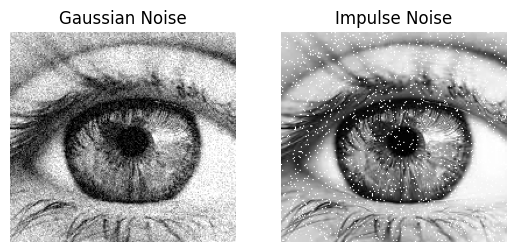

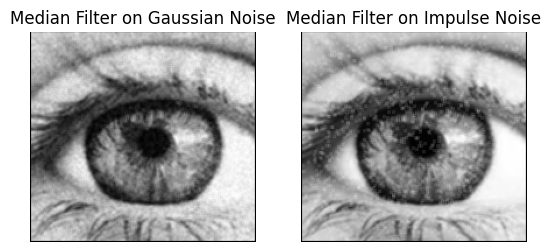

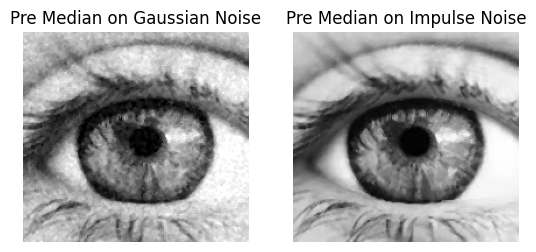

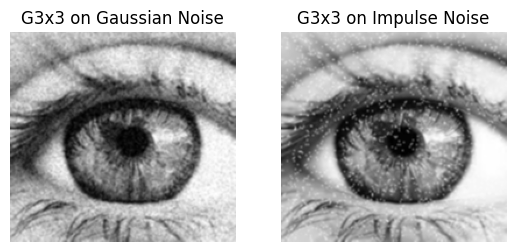

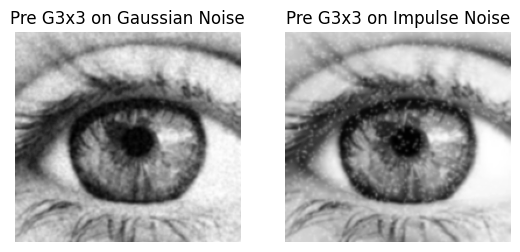

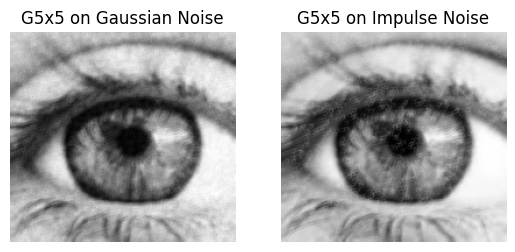

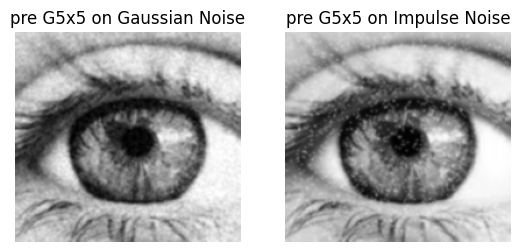

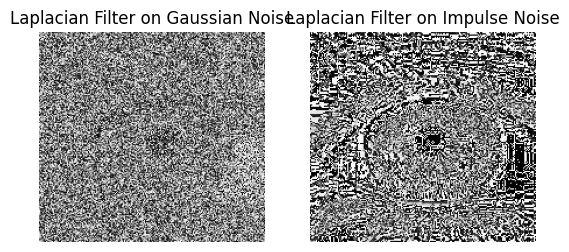

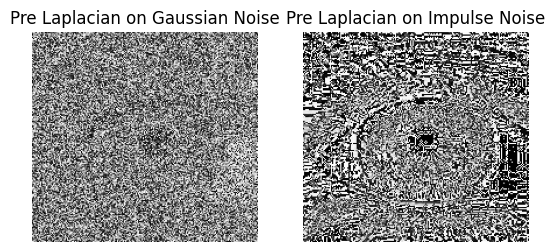

In [ ]:
import matplotlib.pyplot as plt
import cv2
import scipy.ndimage as ndi
# Apply filters on Gaussian and impulse noisy images
gaussian_noisy_image = add_gaussian_noise_gray(gray_image, sigma=25)
impulse_noisy_image = add_impulse_noise(gray_image)

plt.subplot(1, 2, 1)
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')
#plt.savefig('/gaussian_noisy_image.png', bbox_inches='tight', pad_inches=0)

plt.subplot(1, 2, 2)
plt.imshow(impulse_noisy_image, cmap='gray')
plt.title('Impulse Noise')
plt.axis('off')
#plt.savefig('/impulse_noisy_image.png', bbox_inches='tight', pad_inches=0)
plt.show()

''' Median filter '''
median_filtered_gaussian = median_filter(gaussian_noisy_image, 3)
median_filtered_impulse = median_filter(impulse_noisy_image, 3)


plt.subplot(1, 2, 1)
plt.imshow(median_filtered_gaussian, cmap='gray')
plt.title('Median Filter on Gaussian Noise')
plt.axis('off')
#plt.savefig('/median_filtered_gaussian.png', bbox_inches='tight', pad_inches=0)

plt.subplot(1, 2, 2)
plt.imshow(median_filtered_impulse, cmap='gray')
plt.title('Median Filter on Impulse Noise')
plt.axis('off')
#plt.savefig('/median_filtered_impulse.png', bbox_inches='tight', pad_inches=0)
plt.show()

#pre median
pre_median_filtered_gaussian= ndi.median_filter(gaussian_noisy_image, size=3)
pre_median_filtered_impulse = ndi.median_filter(impulse_noisy_image, size=3)


plt.subplot(1, 2, 1)
plt.imshow(pre_median_filtered_gaussian, cmap='gray')
plt.title('Pre Median on Gaussian Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pre_median_filtered_impulse, cmap='gray')
plt.title('Pre Median on Impulse Noise')
plt.axis('off')
plt.show()


''' 3x3 Gaussian filter '''
guassian3_filtered_gaussian = gaussian_filter_3x3(gaussian_noisy_image)
guassian3_filtered_impulse = gaussian_filter_3x3(impulse_noisy_image)

plt.subplot(1, 2, 1)
plt.imshow(guassian3_filtered_gaussian, cmap='gray')
plt.title('G3x3 on Gaussian Noise')
plt.axis('off')
#plt.savefig('/gaussian3_filtered_gaussian.png', bbox_inches='tight', pad_inches=0)

plt.subplot(1, 2, 2)
plt.imshow(guassian3_filtered_impulse, cmap='gray')
plt.title('G3x3 on Impulse Noise')
plt.axis('off')
#plt.savefig('/gaussian3_filtered_impulse.png', bbox_inches='tight', pad_inches=0)
plt.show()

#pre
pre_guassian3_filtered_gaussian = ndi.gaussian_filter(gaussian_noisy_image, sigma=1)
pre_guassian3_filtered_impulse = ndi.gaussian_filter(impulse_noisy_image, sigma=1)

plt.subplot(1, 2, 1)
plt.imshow(pre_guassian3_filtered_gaussian, cmap='gray')
plt.title('Pre G3x3 on Gaussian Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pre_guassian3_filtered_impulse, cmap='gray')
plt.title('Pre G3x3 on Impulse Noise')
plt.axis('off')
plt.show()

''' 5x5 Gaussian filter '''
guassian5_filtered_gaussian = gaussian_filter_5x5(gaussian_noisy_image)
guassian5_filtered_impulse = gaussian_filter_5x5(impulse_noisy_image)

plt.subplot(1, 2, 1)
plt.imshow(guassian5_filtered_gaussian, cmap='gray')
plt.title('G5x5 on Gaussian Noise')
plt.axis('off')
#plt.savefig('/gaussian5_filtered_gaussian.png', bbox_inches='tight', pad_inches=0)

plt.subplot(1, 2, 2)
plt.imshow(guassian5_filtered_impulse, cmap='gray')
plt.title('G5x5 on Impulse Noise')
plt.axis('off')
#plt.savefig('/gaussian5_filtered_impulse.png', bbox_inches='tight', pad_inches=0)
plt.show()

#pre
pre_guassian5_filtered_gaussian = cv2.GaussianBlur(gaussian_noisy_image, (5, 5), 1)
pre_guassian5_filtered_impulse = cv2.GaussianBlur(impulse_noisy_image, (5, 5), 1)

plt.subplot(1, 2, 1)
plt.imshow(pre_guassian5_filtered_gaussian, cmap='gray')
plt.title('pre G5x5 on Gaussian Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pre_guassian5_filtered_impulse, cmap='gray')
plt.title('pre G5x5 on Impulse Noise')
plt.axis('off')
plt.show()

''' Laplacian filter '''
laplacian_filtered_gaussian = laplacian_filter(gaussian_noisy_image)
laplacian_filtered_impulse = laplacian_filter(impulse_noisy_image)


plt.subplot(1, 2, 1)
plt.imshow(laplacian_filtered_gaussian, cmap='gray')
plt.title('Laplacian Filter on Gaussian Noise')
plt.axis('off')
#plt.savefig('/laplacian_filtered_gaussian.png', bbox_inches='tight', pad_inches=0)

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_impulse, cmap='gray')
plt.title('Laplacian Filter on Impulse Noise')
plt.axis('off')
#plt.savefig('/laplacian_filtered_impulse.png', bbox_inches='tight', pad_inches=0)
plt.show()

# pre
pre_laplacian_filtered_gaussian = ndi.laplace(gaussian_noisy_image)
pre_laplacian_filtered_impulse = ndi.laplace(impulse_noisy_image)

plt.subplot(1, 2, 1)
plt.imshow(pre_laplacian_filtered_gaussian, cmap='gray')
plt.title('Pre Laplacian on Gaussian Noise')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pre_laplacian_filtered_impulse, cmap='gray')
plt.title('Pre Laplacian on Impulse Noise')
plt.axis('off')
plt.show()

